# SKLEARN (SCIKIT LEARN)

(1797, 64)


<Figure size 432x288 with 0 Axes>

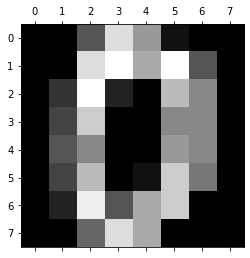

In [3]:
import numpy as np
import matplotlib.pyplot as plt 

from sklearn.datasets import load_digits

digits = load_digits()
print(digits.data.shape)

plt.gray() 
plt.matshow(digits.images[0]) 
plt.show() 

In [4]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [5]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

## Simple classification

In [15]:
from sklearn import neighbors, linear_model

X_digits = digits.data
y_digits = digits.target

n_samples = len(X_digits)

X_train = X_digits[:int(.9 * n_samples)]
y_train = y_digits[:int(.9 * n_samples)]
X_test = X_digits[int(.9 * n_samples):]
y_test = y_digits[int(.9 * n_samples):]

knn = neighbors.KNeighborsClassifier()
logistic = linear_model.LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, max_iter=1000)

print('KNN score: %f' % knn.fit(X_train, y_train).score(X_test, y_test))
print('Logistic Regression score: %f' % logistic.fit(X_train, y_train).score(X_test, y_test))

KNN score: 0.961111
Logistic Regression score: 0.927778


/home/db/bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


## Performing cross validation

In [17]:
#using cv as a different function

from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate

scoring = {'accuracy': make_scorer(accuracy_score)}
cv_results = cross_validate(logistic.fit(X_digits, y_digits), X_digits, y_digits, scoring=scoring)

print ("Results LR")
print (cv_results['train_accuracy'], np.mean(cv_results['train_accuracy']))
print (cv_results['test_accuracy'], np.mean(cv_results['test_accuracy']))

cv_results = cross_validate(knn.fit(X_digits, y_digits), X_digits, y_digits, scoring=scoring)

print ("\nResults KNN")
print (cv_results['train_accuracy'], np.mean(cv_results['train_accuracy']))
print (cv_results['test_accuracy'], np.mean(cv_results['test_accuracy']))

/home/db/bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/db/bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/db/bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/db/bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/db/bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_ite

Results LR


/home/db/bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


KeyError: 'train_accuracy'

In [48]:
# using cv inside the classifier

logistic = linear_model.LogisticRegressionCV(cv=3)
logistic.fit(X_digits, y_digits)

#one versus all
print logistic.scores_[0]

#print('Logistic Regression score: %f' % logistic.scores_)

[[ 0.97840532  1.          1.          1.          1.          1.          1.
   0.99833887  0.99667774  0.99667774]
 [ 0.96494157  0.98998331  0.9933222   0.99499165  0.99499165  0.9966611
   0.9966611   0.9966611   0.9966611   0.9966611 ]
 [ 0.97147651  0.99328859  0.99328859  0.99496644  0.99496644  0.99328859
   0.99328859  0.99328859  0.99328859  0.99328859]]
